In [1]:
#基本语法
import tensorflow as tf
a=tf.constant(3)
b=tf.constant(4)
with tf.Session() as sess:
    print(sess.run(a+b))

7


In [10]:
#前向传播,输入数据固定
x=tf.constant([[0.7,0.5]])
w1=tf.Variable(tf.truncated_normal(shape=[2,3],stddev=1,seed=1))
w2=tf.Variable(tf.truncated_normal(shape=[3,1],stddev=1,seed=1))

a=tf.matmul(x,w1)
y=tf.matmul(a,w2)

with tf.Session() as sess:
    print(sess.run(y))

[[2.4937813]]


In [21]:
#前向传播，投喂已知数据
x=tf.placeholder(tf.float32,shape=[3,2])
w1=tf.Variable(tf.truncated_normal(shape=[2,3],seed=1))
w2=tf.Variable(tf.truncated_normal(shape=[3,1],seed=1))

a=tf.matmul(x,w1)
y=tf.matmul(a,w2)

with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run(y,feed_dict={x:[[0.7,0.5],[0.4,0.3],[0.5,0.6]]}))

[[2.4937813]
 [1.438938 ]
 [2.0179148]]


In [64]:
#前向传播，投喂未知数据
x=tf.placeholder(tf.float32,shape=[None,2])
w1=tf.Variable(tf.truncated_normal(shape=[2,3],stddev=1,seed=1))
w2=tf.Variable(tf.truncated_normal(shape=[3,1],stddev=1,seed=1))

a=tf.matmul(x,w1)
y=tf.matmul(a,w2)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run(y,feed_dict={x:[[0.1,0.2],[0.3,0.1],[0.7,0.5]]}))
    print("W1:\n",sess.run(w1))
    print("W2:\n",sess.run(w2))

[[0.4815356 ]
 [0.95740247]
 [2.4937813 ]]
W1:
 [[-0.8113182   1.4845988   0.06532937]
 [ 0.0992484   0.6396971   1.6108712 ]]
W2:
 [[-0.8113182 ]
 [ 1.4845988 ]
 [ 0.06532937]]


In [91]:
import tensorflow as tf
import numpy as np
BATCH_SIZE = 8
seed = 23455

#0.准备数据
#基于seed产生随机数
rng = np.random.RandomState(seed)
#随机数返回32行2列的矩阵，表示32组体积和重量 作为输入数据集
X=rng.rand(32,2)
#假设评判标准为 体积和重量 和 超过1的话，对应的label为1，否则为0
Y=[[int(x0+x1<1)] for (x0,x1) in X]
print("X:\n",X)
print("Y:\n",Y)

#1.构造网络
#投喂的数据
x=tf.placeholder(tf.float32,shape=[None,2])
y=tf.placeholder(tf.float32,shape=[None,1])
#网络参数
w1=tf.Variable(tf.truncated_normal([2,3],stddev=1,seed=1))
w2=tf.Variable(tf.truncated_normal([3,1],stddev=1,seed=1))

#前向传播
a=tf.matmul(x,w1)
y_hat=tf.matmul(a,w2)

#损失函数
loss = tf.reduce_mean(tf.square(y-y_hat))
#反向传播
train_step = tf.train.GradientDescentOptimizer(1e-3).minimize(loss)
# train_step = tf.train.MomentumOptimizer(1e-3,1e-3).minimize(loss)
# train_step = tf.train.AdamOptimizer(1e-3).minimize(loss)

#会话
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    #训练前参数
    print("before trian:")
    print("W1:\n",sess.run(w1))
    print("W2:\n",sess.run(w2))
    print("\n")
    
    #训练模型
    EPOCHS = 1000
    
    for i in range(EPOCHS):
        for j in range(int(32/BATCH_SIZE)):
            start = j*BATCH_SIZE
            end = start + BATCH_SIZE
            sess.run(train_step,feed_dict={x:X[start:end],y:Y[start:end]})
        if(i%100==0):
            total_loss = sess.run(loss,feed_dict={x:X,y:Y})
            print("after %d epochs,the loss is %g "%(i,total_loss))
    
    
    #训练后参数
    print("after train:")
    print("W1:\n",sess.run(w1))
    print("W2:\n",sess.run(w2))
    

X:
 [[0.83494319 0.11482951]
 [0.66899751 0.46594987]
 [0.60181666 0.58838408]
 [0.31836656 0.20502072]
 [0.87043944 0.02679395]
 [0.41539811 0.43938369]
 [0.68635684 0.24833404]
 [0.97315228 0.68541849]
 [0.03081617 0.89479913]
 [0.24665715 0.28584862]
 [0.31375667 0.47718349]
 [0.56689254 0.77079148]
 [0.7321604  0.35828963]
 [0.15724842 0.94294584]
 [0.34933722 0.84634483]
 [0.50304053 0.81299619]
 [0.23869886 0.9895604 ]
 [0.4636501  0.32531094]
 [0.36510487 0.97365522]
 [0.73350238 0.83833013]
 [0.61810158 0.12580353]
 [0.59274817 0.18779828]
 [0.87150299 0.34679501]
 [0.25883219 0.50002932]
 [0.75690948 0.83429824]
 [0.29316649 0.05646578]
 [0.10409134 0.88235166]
 [0.06727785 0.57784761]
 [0.38492705 0.48384792]
 [0.69234428 0.19687348]
 [0.42783492 0.73416985]
 [0.09696069 0.04883936]]
Y:
 [[1], [0], [0], [1], [1], [1], [1], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [1], [0], [1], [0], [1], [1], [1], [1], [1], [0], [1]]
before trian:
W1:
 [[-0.811318

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
after 0 iterations, train accuracy is 0.11 
after 1000 iterations, train accuracy is 0.85 
after 2000 iterations, train accuracy is 0.77 
after 3000 iterations, train accuracy is 0.95 
after 4000 iterations, train accuracy is 0.96 
after 5000 iterations, train accuracy is 0.97 
after 6000 iterations, train accuracy is 0.99 
after 7000 iterations, train accuracy is 0.98 
after 8000 iterations, train accuracy is 0.99 
after 9000 iterations, train accuracy is 0.98 
after 10000 iterations, train accuracy is 0.99 
after 11000 iterations, train accuracy is 0.97 
after 12000 iterations, train accuracy is 1 
after 13000 iterations, train accuracy is 0.98 
after 14000 iterations, train accuracy is 1 
after 15000 iterations, train accuracy is 1 
after 16000 iterations, train accuracy is 0.98 
after 17000 

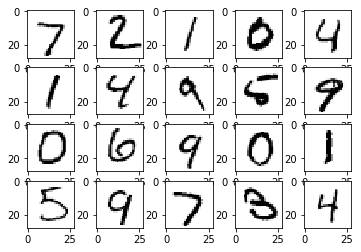

In [272]:
#手写数字识别【普通的神经网络】
import tensorflow as tf 
import urllib 
from  tensorflow.examples.tutorials.mnist  import  input_data
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) #MNIST数据输入

#定义超参数
input_size = 28*28
hidden_size = 30
output_size = 10
batch_size = 100
iteration = 20000

#需要投喂的数据
X = tf.placeholder(tf.float32,[None,input_size])
Y = tf.placeholder(tf.float32,[None,output_size])

#参数定义
W1 = tf.Variable(tf.truncated_normal([input_size,hidden_size],stddev=0.1))
B1 = tf.Variable(tf.constant(0.1),[hidden_size])
W2 = tf.Variable(tf.truncated_normal([hidden_size,output_size],stddev=0.1))
B2 = tf.Variable(tf.constant(0.1),[output_size])

#网络结构定义
hidden_value = tf.matmul(X,W1)+B1
hidden_value = tf.nn.relu(hidden_value)
output_value = tf.matmul(hidden_value,W2)+B2
output_value = tf.nn.relu(output_value)


#定义loss
# loss = tf.reduce_mean(tf.square(output_value-Y))
# loss = -tf.reduce_mean(Y*tf.log(a)+(1-Y)*tf.log(1-a),axis = 1)
loss = tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=output_value)
opt = tf.train.AdamOptimizer(1e-3).minimize(loss)
# opt = tf.train.GradientDescentOptimizer(1e-3).minimize(loss)

#定义准确率
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output_value,1),tf.argmax(Y,1)),"float"))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #训练
    for i in range(iteration):
        batch_X , batch_Y = mnist.train.next_batch(batch_size)
        _ , loss_value = sess.run([opt,loss],feed_dict={X:batch_X,Y:batch_Y})
        if i%1000 == 0:
            train_accuracy = sess.run(accuracy,feed_dict={X:batch_X,Y:batch_Y})
            print("after %d iterations, train accuracy is %g "%(i,train_accuracy))
    #预测
    test_accuracy = sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels})
    print("test accuracy is %g"%test_accuracy)
    #可视化
    n = 20 #显示前n张数字图片        
    final_opt_a=tf.argmax (output_value, 1).eval(session=sess,feed_dict = {X: mnist.test.images,Y: mnist.test.labels})
    y_ = sess.run(tf.argmax(mnist.test.labels,axis=1))
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(y_,final_opt_a),"float"))
    print("test accuracy is : %g"%sess.run(test_accuracy))
    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('前{}张图片预测结果为：'.format(n))
    for i in range(n):
        print(final_opt_a[i],end=',')
        if int((i+1)%5) ==0:
            print('\t')
        #图片可视化展示
        img = mnist.test.images[i].reshape((28,28))#读取每行数据，格式为Ndarry
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')#可视化
    print('测试集前{}张图片为：'.format(n))
    plt.show()

    

In [236]:
a = tf.constant([[0.08979286,0.08979286,0.08979286,0.1325208,0.09812135,0.08979286,0.08979286,0.08979286,0.13547444,0.09512633],
                 [0.08979286,0.08979286,0.08979286,0.1325208,0.09812135,0.08979286,0.08979286,0.08979286,0.13547444,0.09512633]])
b = tf.constant([[0.,0. ,0., 0., 0., 0., 0., 1., 0., 0.],[0. ,0., 0., 0., 0., 0., 0., 1., 0., 0.]])
with tf.Session() as sess:
    print(sess.run(tf.reduce_mean(b*tf.log(a)+(1-b)*tf.log(1-a),axis=1)))

[-0.33716384 -0.33716384]


In [1]:
import tensorflow as tf 
import urllib 
from  tensorflow.examples.tutorials.mnist  import  input_data
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) #MNIST数据输入

input_size = 28*28
output_size = 10
batch_size = 50
iteration = 10000

X = tf.placeholder(tf.float32,[None,input_size])
X_image = tf.reshape(X,[-1,28,28,1])
Y = tf.placeholder(tf.float32,[None,output_size])
W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,32],stddev=0.1))
B_conv1 = tf.Variable(tf.constant(0.1),[32])
W_conv2 = tf.Variable(tf.truncated_normal([5,5,32,64],stddev=0.1))
B_conv2 = tf.Variable(tf.constant(0.1),64)

#第一层卷积池化
h_conv1 = tf.nn.conv2d(input=X_image,filter=W_conv1,strides=[1,1,1,1],padding="SAME")+B_conv1
h_pool1 = tf.nn.max_pool(value=h_conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

#第二层卷积池化
h_conv2 = tf.nn.conv2d(h_pool1,W_conv2,[1,1,1,1],"SAME")+B_conv2
h_pool2 = tf.nn.max_pool(h_conv2,[1,2,2,1],[1,2,2,1],padding = "SAME")

#全连接层
feature = tf.reshape(h_pool2,[-1,7*7*64])
W_fc1 = tf.Variable(tf.truncated_normal([7*7*64,1024],stddev=0.1))
B_fc1 = tf.Variable(tf.constant(0.1),[1024])
W_fc2 = tf.Variable(tf.truncated_normal([1024,10],stddev=0.1))
B_fc2 = tf.Variable(tf.constant(0.1),[10])
h_fc1 = tf.nn.relu(tf.matmul(feature,W_fc1)+B_fc1)
#drop out 
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

output_value = tf.nn.relu(tf.matmul(h_fc1_drop,W_fc2)+B_fc2)




#定义loss，优化器
loss = tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=output_value)
opt = tf.train.AdamOptimizer(1e-4).minimize(loss)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output_value,1),tf.argmax(Y,1)),"float"))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(iteration):
        input_batch , label_batch = mnist.train.next_batch(batch_size)
        _,loss_value = sess.run([opt,loss],feed_dict={X:input_batch,Y:label_batch,keep_prob:0.5})
        if i % 100 == 0 :
            print("after %d train accuracy: "%i,sess.run(accuracy,feed_dict={X:input_batch,Y:label_batch,keep_prob:1.0}))
            
    
    #测试集准确率
    test_accuracy = sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels,keep_prob:0.5})
    print("test accuracy is ",test_accuracy)




Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

after 0 train accuracy:  0.1
after 100 